In [1]:
import os
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np

from functionsFIMS import getAnalysisNumbers
from runDataClass import runData
from polyaClass import myPolya

In [2]:
if __name__ == '__main__':
    runNos = getAnalysisNumbers()
    simData = runData(runNos[0])
    treenames = simData.getTreeNames()
    print(treenames)
    for name in treenames:
        simData.printColumns(name)

['metaData', 'fieldLineData', 'gridFieldLineData', 'electronData', 'ionData', 'avalancheData', 'electronTrackData']
metaData:
['Git Version', 'runNo', 'Pad Length', 'Pitch', 'Grid Standoff', 'Grid Thickness', 'Hole Radius', 'Cathode Height', 'Thickness SiO2', 'Electric Field Ratio', 'Number of Field Lines', 'Field Transparency', 'Field Transparency Limit', 'Number of Avalanches', 'Avalanche Limit', 'Gas Comp: Ar', 'Gas Comp: CO2', 'Simulation Run Time']
fieldLineData:
['Field Line ID', 'Field Line x', 'Field Line y', 'Field Line z']
gridFieldLineData:
['Field Line ID', 'Grid Line Location', 'Field Line x', 'Field Line y', 'Field Line z']
electronData:
['Avalanche ID', 'Electron ID', 'Initial x', 'Initial y', 'Initial z', 'Initial Time', 'Initial Energy', 'Final x', 'Final y', 'Final z', 'Final Time', 'Final Energy', 'Exit Status']
ionData:
['Avalanche ID', 'Electron ID', 'Ion Charge', 'Initial x', 'Initial y', 'Initial z', 'Initial Time', 'Final x', 'Final y', 'Final z', 'Final Time', 

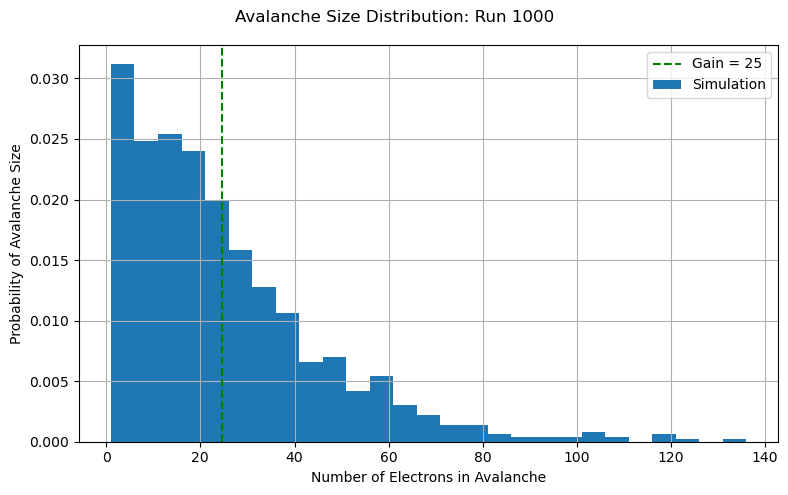

Fit converged. Gain: 24.973 (+/- 0.678), Theta: 0.584 (+/- 0.097)
Fit converged. Gain: 23.616 (+/- 0.830), Theta: 0.000 (+/- 0.080)


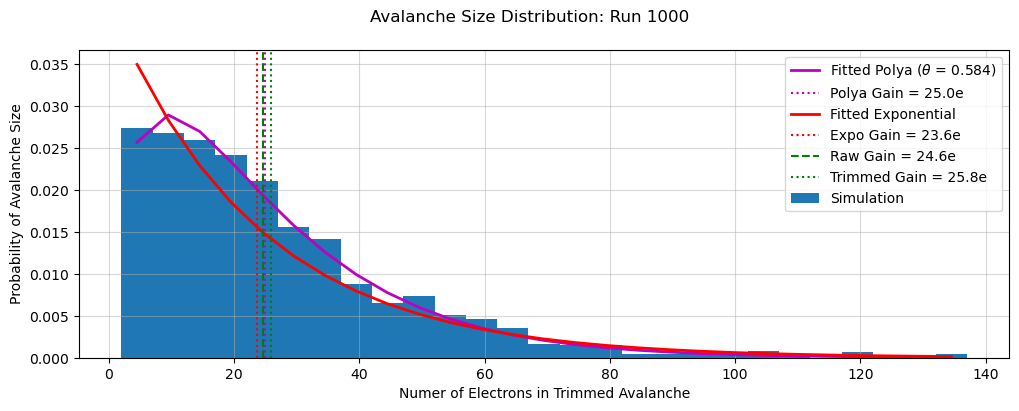

In [3]:
simData.plotAvalancheSize(binWidth=5)
simData.plotAvalancheFits(binWidth=5)

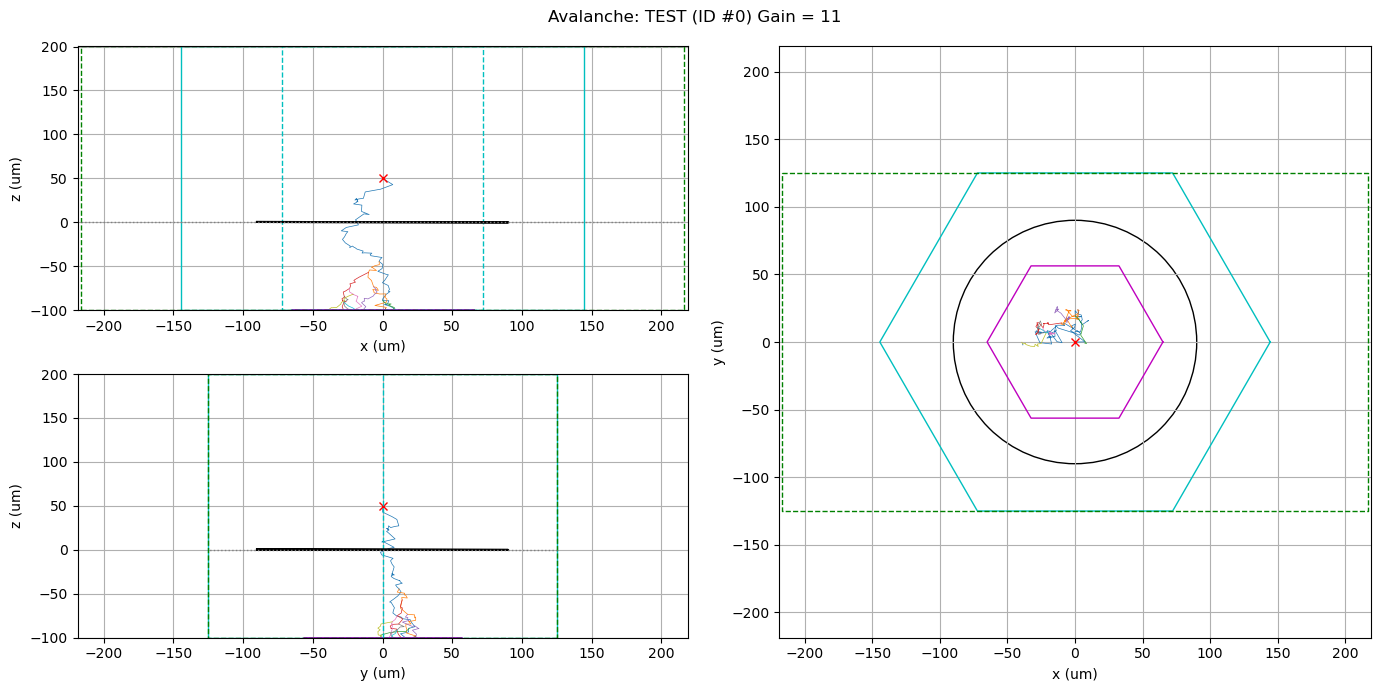

In [4]:
simData.plotAvalanche2D(plotName='TEST')

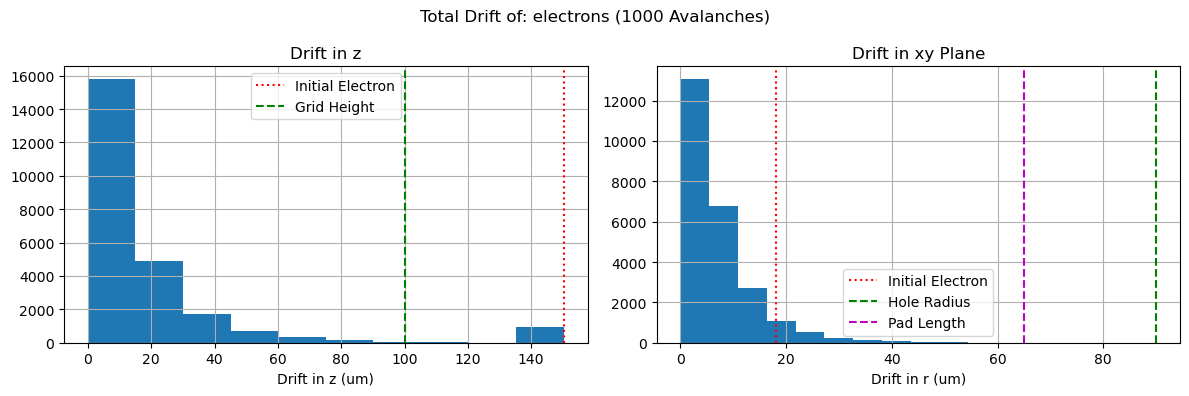

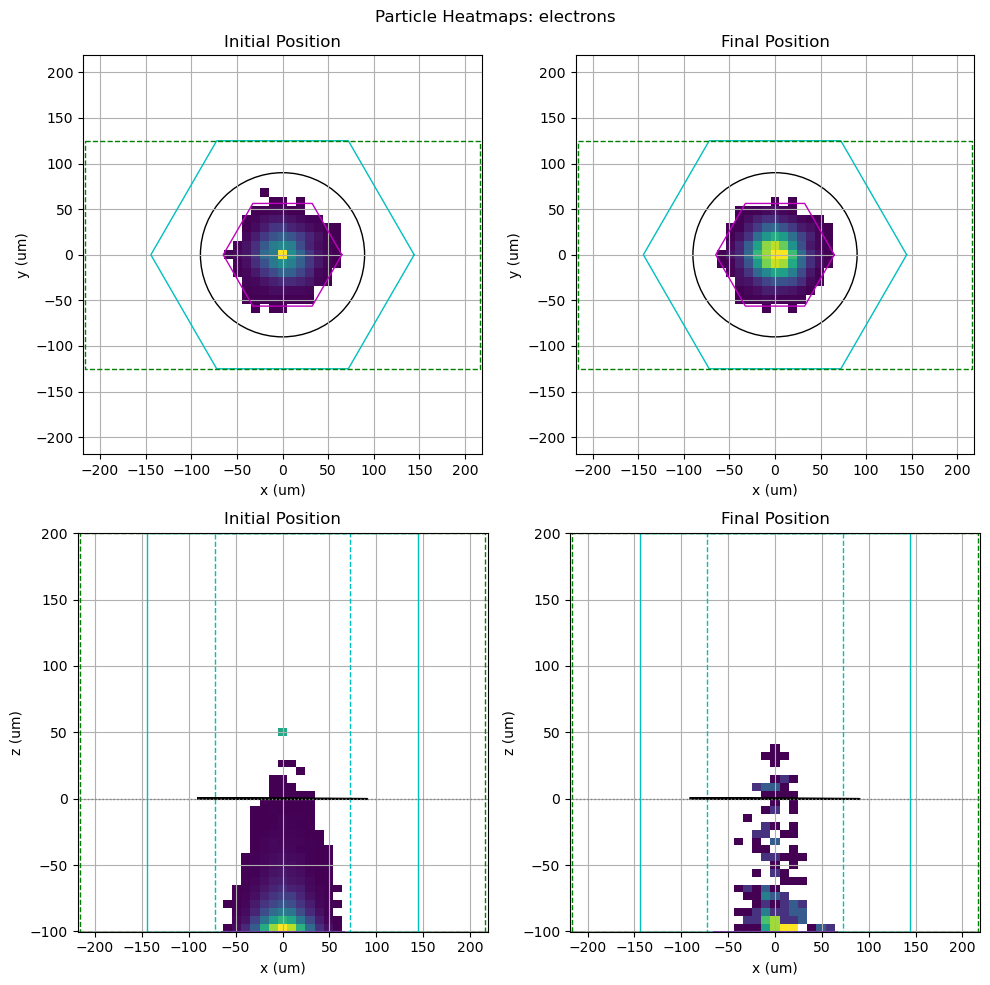

In [5]:
particle = 'electron'
simData.plotDiffusion(particle)
simData.plotParticleHeatmaps(particle)